# Описание проекта
<div style="border-radius: 15px; border: 2px solid green; padding: 15px;">
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
</div>

## Открываем файл с данными

In [1]:
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv('/games.csv')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Проверим содержимое:
</div>

In [2]:
print(df.head(5), '\n')
df.info()
df.describe()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
16715 строк с пропусками в различных столбцах и наименованиями столбцов с заглавными буквами, пройдем по кажому столбцу в отдельности.
</div>

## Изучение и подготовка данных

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Начнем с приведения названий столбцов к стандарту, а именно к строчным буквам:
</div>

In [3]:
col = map(lambda x:x.lower(), df.columns.tolist())
df.columns=col

In [4]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Cтолбец 'name'

In [5]:
print(df['name'].value_counts(dropna=False).sort_values(ascending=False))

Need for Speed: Most Wanted                     12
Ratatouille                                      9
Madden NFL 07                                    9
LEGO Marvel Super Heroes                         9
FIFA 14                                          9
                                                ..
Memories Off: Sorekara Again                     1
Alone in the Dark: One-Eyed Jack's Revenge       1
Simple DS Series Vol. 42: The Haioku Byoutou     1
Dragon Quest V: Hand of the Heavenly Bride       1
Dragon Ball: Daimaou Fukkatsu                    1
Name: name, Length: 11560, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Вот и игра представленная на большем количестве платформ, а по данным есть пропуски, достоверно заполнить не представляется возможным, но удалять не будем, так как эти данные пригодятся при учете продаж по платформам:
</div>

In [6]:
print(df[df['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


### Столбец 'platform'

In [7]:
print(df['platform'].value_counts(dropna=False).sort_values(ascending=False))

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Вот и платформа с наибольшим количеством игр, а вот с данными все в порядке, пропусков нет.
</div>

### Столбец 'year_of_release'

In [8]:
print(df['year_of_release'].value_counts(dropna=False).sort_index())

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
NaN        269
Name: year_of_release, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Года выпуска в неверном формате, изменим:
</div>

In [9]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
#df['year_of_release'] = df['year_of_release'].values.astype('datetime64[Y]')
df['year_of_release'].describe

<bound method NDFrame.describe of 0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64>

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Так же мы видим пропуски, и даже можем сказать, что в списке с пропусками года есть повторяющиеся игры, на разных платформах:
</div>

In [10]:
cdf = df[df['year_of_release'].isna()].groupby('name', as_index=False)['platform'].count().sort_values(by='platform', ascending=False)

In [11]:
cdf

,name,platform
95,LEGO Harry Potter: Years 5-7,7
149,Rock Band,4
77,Happy Feet Two,4
217,WRC: FIA World Rally Championship,3
186,Test Drive Unlimited 2,3
...,...,...
85,Indy 500,1
86,Inversion,1
87,James Cameron's Dark Angel,1
88,Jet Impulse,1


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Но заполнить эти пропуски со 100%-ой уверенностью мы не можем, так как на разных платформах годы релиза могут отличаться. Не забываем все эти данные и так выборки из данных, так что мы обязаны будем использовать статистические методы анализа и теорию вероятности.
</div>

### Столбец 'genre'

In [12]:
print(df['genre'].value_counts(dropna=False).sort_values(ascending=False))

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: genre, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Данные по жанрам выглядят нормально, пропуски в двух строках совпадают с пропусками в назвниях игр. Так же можно убедиться, что лидируют активные жангры.
</div>

### Столбец 'na_sales'

In [13]:
print(df['na_sales'].value_counts(dropna=False).sort_index(ascending=False))

41.36       1
29.08       1
26.93       1
23.20       1
15.68       1
         ... 
0.04      549
0.03      561
0.02      576
0.01      545
0.00     4508
Name: na_sales, Length: 402, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Данные по продажам в миллионах проданных штук, 0 здесь вполне реалестичны, так как это говорит о том, что продано менее 5000 игр. А вот представление данных в миллионах штук мне не кажется удобным, да и хранить приходится в числах с плавающей запятой. Переведем данные в тысяци штук и в целочисленный формат:
</div>

In [14]:
df['na_sales'] = (df['na_sales'] * 1000).astype('int')

In [15]:
print(df['na_sales'].value_counts(dropna=False).sort_index(ascending=False))

41360       1
29080       1
26930       1
23200       1
15680       1
         ... 
40        549
30        561
20        576
10        545
0        4508
Name: na_sales, Length: 402, dtype: int64


### Столбец 'eu_sales'

In [16]:
print(df['eu_sales'].value_counts(dropna=False).sort_index(ascending=False))

28.96       1
12.76       1
10.95       1
10.93       1
9.20        1
         ... 
0.04      709
0.03      926
0.02     1308
0.01     1494
0.00     5870
Name: eu_sales, Length: 307, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Такая же ситуация как и в столбце с данными по NA региону, и набор действий будет аналогичным:
</div>

In [17]:
df['eu_sales'] = (df['eu_sales'] * 1000).astype('int')

In [18]:
print(df['eu_sales'].value_counts(dropna=False).sort_index(ascending=False))

28960       1
12760       1
10950       1
10930       1
9200        1
         ... 
40        709
30        926
20       1308
10       1494
0        5870
Name: eu_sales, Length: 307, dtype: int64


### Столбец 'jp_sales'

In [19]:
print(df['jp_sales'].value_counts(dropna=False).sort_index(ascending=False))

10.22        1
7.20         1
6.81         1
6.50         1
6.04         1
         ...  
0.04       397
0.03       546
0.02       741
0.01       706
0.00     10514
Name: jp_sales, Length: 244, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Действуем по аналогии с двумя предыдущими регионами:
</div>

In [20]:
df['jp_sales'] = (df['jp_sales'] * 1000).astype('int')

In [21]:
print(df['jp_sales'].value_counts(dropna=False).sort_index(ascending=False))

10220        1
7200         1
6810         1
6500         1
6040         1
         ...  
40         397
30         546
20         741
10         706
0        10514
Name: jp_sales, Length: 244, dtype: int64


### Столбец 'other_sales'

In [22]:
print(df['other_sales'].value_counts(dropna=False).sort_index(ascending=False))

10.57       1
8.45        1
7.53        1
3.96        1
3.29        1
         ... 
0.04      654
0.03      926
0.02     1618
0.01     3464
0.00     6601
Name: other_sales, Length: 155, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Действуем по аналогии с предыдущими регионами:
</div>

In [23]:
df['other_sales'] = (df['other_sales'] * 1000).astype('int')

In [24]:
print(df['other_sales'].value_counts(dropna=False).sort_index(ascending=False))

10570       1
8450        1
7530        1
3960        1
3290        1
         ... 
40        654
30        926
20       1618
10       3464
0        6601
Name: other_sales, Length: 155, dtype: int64


### Столбец 'critic_score'

In [25]:
print(df['critic_score'].value_counts(dropna=False).sort_values(ascending=False))

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
17.0       1
22.0       1
13.0       1
21.0       1
Name: critic_score, Length: 83, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Около половины игр не имеют оценки критиков, но и заполнить такие данные достоверно не представляется возможным, опять же если попробовать заполнить эти данные аналогичными данными с других платформ, то мы можем ошибиться, оценки одной и той же игры могут отличаться от платформы к платформе.  Не забываем все эти данные и так выборки из данных, так что мы обязаны будем использовать статистические методы анализа и теорию вероятности.
</div>

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
А вот тип данных мы заменим на целочисленный, оцентка находится в диапазоне от 0 до 100 и не может иметь дробных значений:
</div>

In [26]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [27]:
print(df['critic_score'].value_counts(dropna=False).sort_values(ascending=False))

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
22.0       1
13.0       1
17.0       1
21.0       1
Name: critic_score, Length: 83, dtype: int64


### Столбец 'user_score'

In [28]:
print(df['user_score'].value_counts(dropna=False).sort_values(ascending=False))

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
2.3       2
0.7       2
1         2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Большое количество игр не имеют оценки критиков, но как и ранее заполнить такие данные достоверно не представляется возможным, опять же если попробовать заполнить эти данные аналогичными данными с других платформ, то мы можем ошибиться, оценки одной и той же игры могут отличаться от платформы к платформе.  Повторяясь - все эти данные и так выборки из данных, так что мы обязаны будем использовать статистические методы анализа и теорию вероятности, искажать данные не верным заполнением не целесообразно, заполненных данных достаточно много.

В данных присутствует значение TBD (to be defined), для нас отстуствие значения и декларация намерения заполненить значение равнозначны, произведем замену:
</div>

In [29]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

In [30]:
print(df['user_score'].value_counts(dropna=False).sort_values(ascending=False))

NaN    9125
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.3       2
0.6       2
2.3       2
0.0       1
9.7       1
Name: user_score, Length: 96, dtype: int64


### Столбец 'rating'

In [31]:
print(df['rating'].value_counts(dropna=False).sort_values(ascending=False))

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Рейтинги с большим количеством пропусков и устаревшими обозначениемя. Устаревшие обозначения поменяем на современные, а 3 игры без рейтинга изменим на NaN, так же не будем заполнять значения каким либо рейтингом по приведенным выше причинам, версии игр могут отличаться от платформы к платформе и, теоретически, могут иметь разный рейтинг. Но для дальнейшей работы с данными мы заполним пропуски занчением 'unrated', так игры без рейтинга будут присутствовать в анализе.
</div>

In [32]:
df.loc[df['rating'] == 'RP', 'rating'] = np.nan

In [33]:
df.loc[df['rating'] == 'EC', 'rating'] = 'E'

In [34]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

In [35]:
df['rating'] = df['rating'].fillna('unrated')

In [36]:
print(df['rating'].value_counts(dropna=False).sort_values(ascending=False))

unrated    6769
E          4001
T          2961
M          1563
E10+       1420
AO            1
Name: rating, dtype: int64


### Проверка наличия дубликатов

In [37]:
df.duplicated().value_counts()

False    16715
dtype: int64

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Совпадения занчений в с толбцах это норма, так что проверили на полные будликаты строк и таковых не обнаружили, двигаемся дальше.
</div>

## Исследовательский анализ данных

### Игр за год

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Представим данные в виде гистограммы и таблицы, после сделаем выводы:
</div>

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

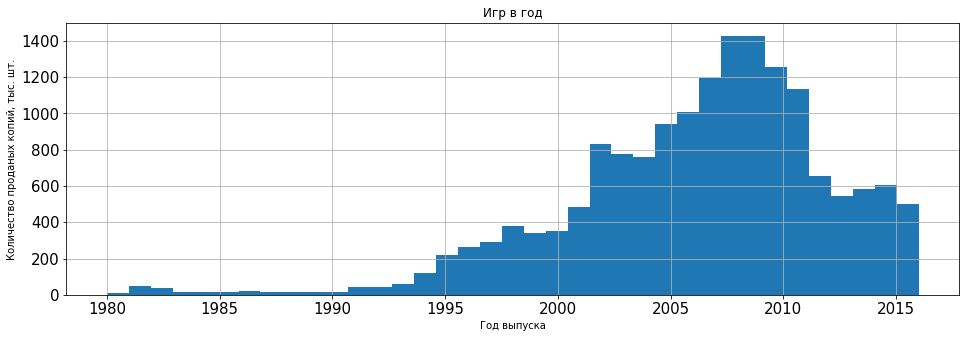

In [38]:
df['year_of_release'].plot(kind='hist', title='Игр в год', grid=True, bins=37, figsize=(16,5), fontsize=15)
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданых копий, тыс. шт.')

In [39]:
df.pivot_table(
    index='year_of_release', values='name', aggfunc='count'
)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
На заре игростроя количество игр выпускаемых в год неуклонно росло. А далее виден переломный момент, в 2008 году случился глобальный экономический кризись, который очень серьезно сказался на экспоненциально растущем рынке игр. В то время игры выпускало большое число различных студий очень разных размеров, именно тогда выходили массово игры категории Б, это средне бюджетные игры с небольшими командами разработки. После кризиса выжили крупные игроки с большими бюджетами и делающие ставки на блокбастеры, а их делать дольше, вот так и понизилось количество выпускаемых игр.
    PS в наших текущих реалиях картина меняется снова ;)
</div>

### Платформы

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Посмотрим, как менялись продажи по платформам, для начала сумируем продажи по регионам:
</div>

In [40]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Далее отберем в отдельный фрейм данные по лучшим платформам в части продаж. Отбросим относительно маленькие по продажам платформы и порог выберем так, что бы не отбросить платформы имеющие значимые продажи в последний год.
</div>

In [41]:
top = df.groupby(['platform'], as_index=False)['total_sales'].sum()\

top = top[top['total_sales'] > 150000]

top_platforms = top['platform'].reset_index().drop(['index'], axis=1)

top_platforms = top_platforms['platform'].tolist()

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Берем топовые платформы и пересобираем фрейм подходящий для визуализации.
</div>

In [42]:
pltop = df.query('platform in @top_platforms').pivot_table(index='year_of_release', columns='platform', values='total_sales',
              aggfunc='sum', fill_value=0)

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

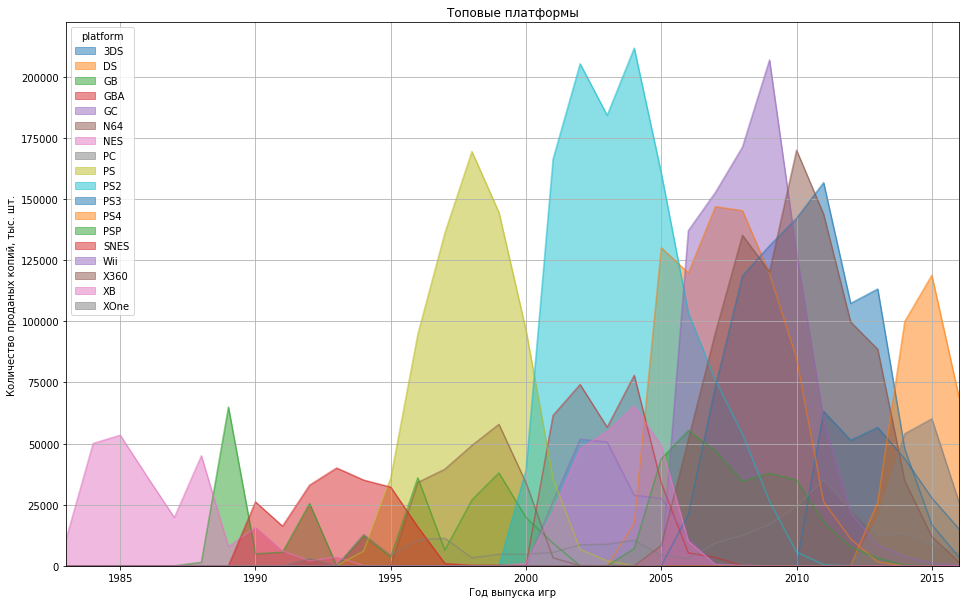

In [43]:
pltop.plot.area(figsize=(16,10), title='Топовые платформы', grid=True, stacked=False)
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Даже отбросив отностиельно не успешные платформы, мы получаем не самый наглядный график, но смело можно судить о тенденциях. На примере самых популярных платформ (PS, PS2, PS3, Wii)видно, что присутствует такое понятие как поколения платформ, которые длятся 7-9 лет. А вот самая популярная консоль последних поколений PS2 пробыла актуальной все 10 лет.
    
На момент захваченный в нашем фрейме видно, что текущее поколений это PS4, XOne. Но на начало этого покаления показывали больщие продажи другие платформы, не актуальные на 2016 год, поэтому преиод нужно выбрать максимально узкий.
</div>

### Актуальный период

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Астрологи объявили годом начала актуального периода 2014 год, как начало последнего поколения.
</div>

In [44]:
pltop_actual = pltop.query('year_of_release >= 2014')

In [45]:
df_2014 = df.query('year_of_release >= 2014')

In [46]:
pltop_actual

platform,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
2014,43760,0,0,0,0,0,0,13280,0,0,47759,100000,240,0,3750,34740,0,54070
2015,27780,0,0,0,0,0,0,8520,0,0,16820,118900,120,0,1140,11960,0,60140
2016,15140,0,0,0,0,0,0,5250,0,0,3600,69250,0,0,180,1520,0,26150


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Далее постараемся ответить на вопрос поставленный в задании: Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

</div>

In [47]:
pltop_actual.columns=['3DS', 'DS', 'GB', 'GBA', 'GC', 'N64', 'NES', 'PC', 'PS', 'PS2', 'PS3','PS4','PSP', 'SNES', 'Wii', 'X360', 'XB', 'XOne']

In [48]:
pltop_actual

,3DS,DS,GB,GBA,GC,N64,NES,PC,PS,PS2,PS3,PS4,PSP,SNES,Wii,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
2014,43760,0,0,0,0,0,0,13280,0,0,47759,100000,240,0,3750,34740,0,54070
2015,27780,0,0,0,0,0,0,8520,0,0,16820,118900,120,0,1140,11960,0,60140
2016,15140,0,0,0,0,0,0,5250,0,0,3600,69250,0,0,180,1520,0,26150


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Много лишних платформ, которых нет в периоде, уберем:
</div>

In [49]:
pltop_actual =  pltop_actual[['3DS', 'PC', 'PS3','PS4', 'Wii', 'X360', 'XOne']]
pltop_actual

,3DS,PC,PS3,PS4,Wii,X360,XOne
year_of_release,,,,,,,
2014,43760,13280,47759,100000,3750,34740,54070
2015,27780,8520,16820,118900,1140,11960,60140
2016,15140,5250,3600,69250,180,1520,26150


Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

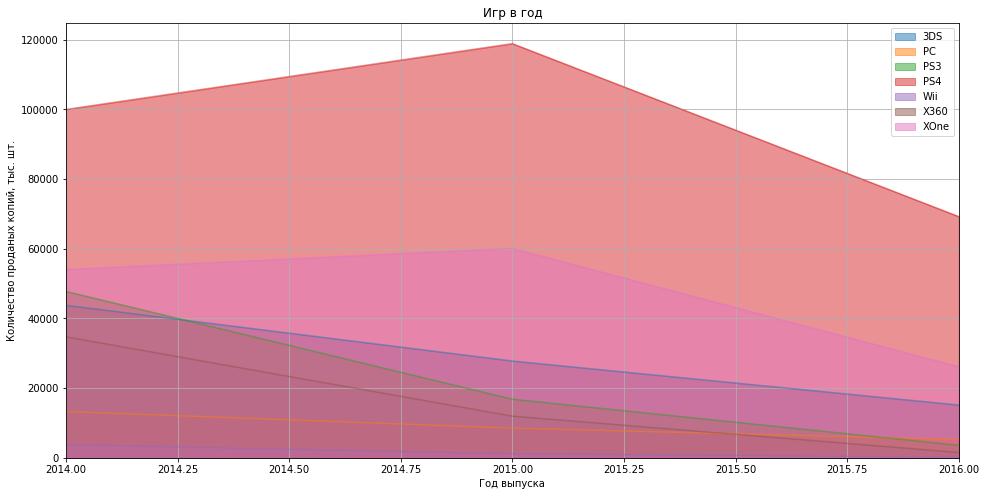

In [50]:
pltop_actual.plot.area(figsize=(16,8), title='Игр в год', grid=True, stacked=False)
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
На графике выше уже нагляднее предсталяется картина предваряющая прогнозируемый год. PS3, X360, Wii, 3DS находятся на закате покаления и делать на них ставку было бы не верно. Ставку будем делать на PS4, XOne и PC, последняя стабильно присутствует на рынке и окончательного заката у неё не случится, хотя приоритет все же на первых двух платформах. PS4 и XOne находятся на середине цикла, пусть продажи не росли в 2016, но конкурентов у них в 2017 не предвидится, останавливаемся на них.
</div>

### Анализ по графикам «ящик с усами»

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
График "ящик с усами" может характеризовать жизнинный цикл платформы в наблюдаемый период, построим эти графики для топовых платформ:
</div>

#### 3DS

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

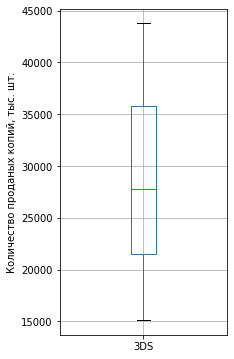

In [52]:
pltop_actual.boxplot(column='3DS', grid=True, figsize=(3, 6))
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Длинный ящик типичных значений, близость верхнего уса и высоко расположенная отметка среднего значения, говорит о стабильности показателей продаж платформы в наблюдаемый период. 3DS стабильно хорошо показывала себя в последние годы. 
</div>

#### PC

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

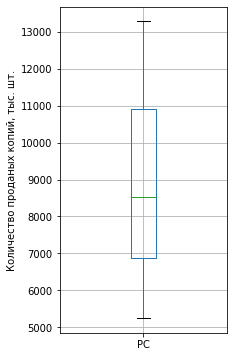

In [53]:
pltop_actual.boxplot(column='PC', grid=True, figsize=(3, 6))
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Не высокие цифры продаж, а так же короткий ящик типичных значений, не типичные значения за верхним усом и при этом высоко расположенная отметка среднего значения, говорит о серьезной не стабильности показателей продаж платформы в наблюдаемый период. PC хоть и вечен, но не стабилен.
    
PS я склонен преположить, что во фрейме нет информации из Steam...
</div>

#### PS3

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

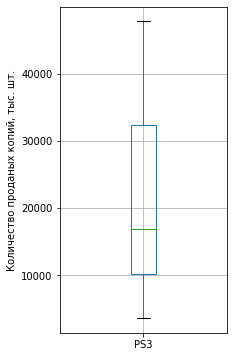

In [54]:
pltop_actual.boxplot(column='PS3', grid=True, figsize=(3, 6))
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Длинный ящик типичных значений, крайняя близость верхнего уса и не высоко расположенная отметка среднего значения, говорит о высокой стабильности показателей продаж платформы в наблюдаемый период, но присутствуют низкие показатели в значимом количесве. PS3 стабильно хорошо показывала себя в последние годы, но показывает стабильно низки резкльтаты в последние годы.
</div>

#### PS4

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

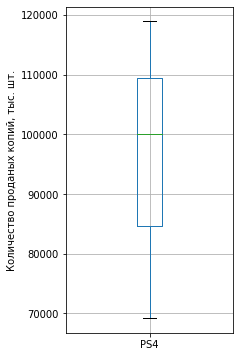

In [55]:
pltop_actual.boxplot(column='PS4', grid=True, figsize=(3, 6))
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Длинный ящик типичных значений, крайняя близость верхнего уса и достаточно высоко расположенная отметка среднего значения, говорит о высокой стабильности показателей продаж платформы в наблюдаемый период, и тут как раз нет низких показателей в конце. PS4 стабильно хорошо показывала себя в последние годы, похоже самое сбалансированное распределение из приведенных в этом разделе.
</div>

#### Wii

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

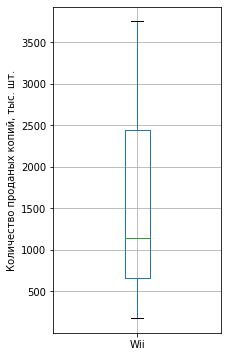

In [56]:
pltop_actual.boxplot(column='Wii', grid=True, figsize=(3, 6))
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Тут типичная картина угасания поколения, выброс вверх, короткий ящик и низкое среднее, в любом случае типично для Wii, которое очень хорошо выстрелило в какойто момент, а потом довольно сильно просело, но долго затухало.
</div>

#### X360

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

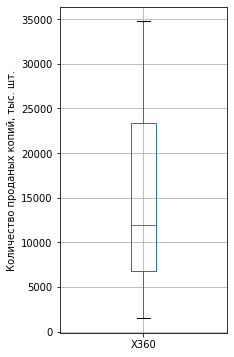

In [57]:
pltop_actual.boxplot(column='X360', grid=True, figsize=(3, 6))
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Прямой конкурент PS3 показывает и схожий график, только абсолютные цифры меньше. Хороший показатель стабильности X360 и низкие показатели последних лет подвинули отметку среднего ниже.
</div>

#### XOne

Text(0, 0.5, 'Количество проданых копий, тыс. шт.')

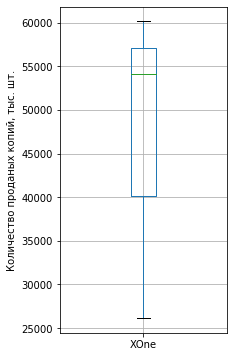

In [58]:
pltop_actual.boxplot(column='XOne', grid=True, figsize=(3, 6))
plt.ylabel('Количество проданых копий, тыс. шт.')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
А прямой конкурент PS4 показывает схожий график, только и абсолютные цифры меньше и среднее ниже. PS4 во всем успешнее чем XOne, но от этого последгний не перестал быть второй платформой на рынке.
</div>

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
PS не покидает ощущение, что это было видно и без этих графиков, но дублируем анализ другим представлением данных.
</div>

### Влияние на продажи внутри одной платформы отзывов пользователей и критиков.

#### Отзывы критиков PS4

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Выделим из основного фрейма данные по платформе PS4, уберем пропуски и приведем к нужному типу:
</div>

In [59]:
df_ps4 = df_2014[df_2014['platform'] == 'PS4']

In [60]:
df_ps4_cs = df_ps4.dropna(subset=['critic_score'])

In [61]:
df_ps4_cs.loc[:,['critic_score']] = df_ps4_cs['critic_score'].astype('int')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Построим диаграмму распределения и посмотрим коэффициент линейной зависимости:
</div>

Коэффициент Пирсона - 0.4026614106810412


Text(0, 0.5, 'Рейтинг критиков')

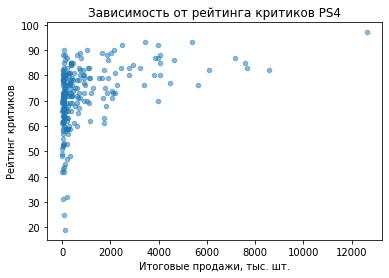

In [62]:
df_ps4_cs.plot(x='total_sales', y='critic_score', kind='scatter', title='Зависимость от рейтинга критиков PS4', alpha=0.5)
print('Коэффициент Пирсона -', df_ps4_cs['total_sales'].corr(df_ps4_cs['critic_score'])) 
plt.xlabel('Итоговые продажи, тыс. шт.')
plt.ylabel('Рейтинг критиков')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
По цифре и диаграмме видно, что линейная зависимость присутствует, при этом значительная,но не максимальная. Делаем вывод, что рейтинг от критиков конечно сильно важен, но можно добиться успеха и не случшим рейтингом, обратное тоже верно.
</div>

#### Отзывы пользователей PS4

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Из данных по платформе выберем данные с рейтингом пользователей, уберем пропуски:
</div>

In [63]:
df_ps4_us = df_ps4.dropna(subset=['user_score'])

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Построим диаграмму распределения и посмотрим коэффициент линейной зависимости:
</div>

Коэффициент Пирсона - -0.04013158947269736


Text(0, 0.5, 'Рейтинг пользователей')

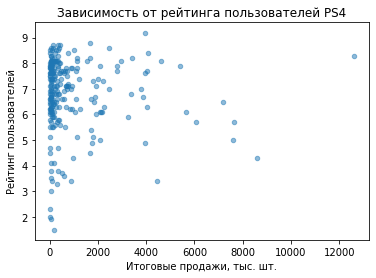

In [64]:
df_ps4_us.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.5, title='Зависимость от рейтинга пользователей PS4')
print('Коэффициент Пирсона -', df_ps4_us['total_sales'].corr(df_ps4_us['user_score'])) 
plt.xlabel('Итоговые продажи, тыс. шт.')
plt.ylabel('Рейтинг пользователей')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
По цифре и диаграмме видно, что линейная зависимость вежду оценками пользователей и продажами нет, как и обратной зависимости, ибо отрицательное знгачение слишком мало. Делаем вывод, что отзывы пользователей не влияют на продажи на платформе PS4.
</div>

#### Отзывы критиков XOne

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Выделим из основного фрейма данные по платформе XOne, уберем пропуски и приведем к нужному типу:
</div>

In [65]:
df_xone = df_2014[df_2014['platform'] == 'XOne']

In [66]:
df_xone_cs = df_xone.dropna(subset=['critic_score'])

In [67]:
df_xone_cs.loc[:,['critic_score']] = df_xone_cs['critic_score'].astype('int')

In [68]:
df_xone_cs.loc[:,['total_sales']] = df_xone_cs['total_sales'].astype('int')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Построим диаграмму распределения и посмотрим коэффициент линейной зависимости:
</div>

Коэффициент Пирсона - 0.4286769437033317


Text(0, 0.5, 'Рейтинг критиков')

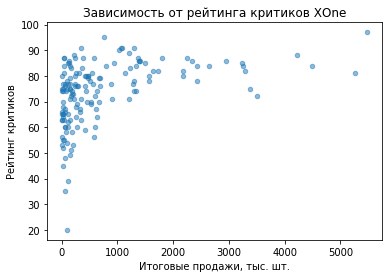

In [69]:
df_xone_cs.plot(x='total_sales', y='critic_score', kind='scatter', title='Зависимость от рейтинга критиков XOne', alpha=0.5)
print('Коэффициент Пирсона -', df_xone_cs['total_sales'].corr(df_xone_cs['critic_score'])) 
plt.xlabel('Итоговые продажи, тыс. шт.')
plt.ylabel('Рейтинг критиков')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Результаты схожи с предыдущей платформой, и визульно и по коэффициенту видно, что рейтинг критиков врияет на продажи.
</div>

#### Отзывы пользователей XOne

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Из данных по платформе выберем данные с рейтингом пользователей, уберем пропуски:
</div>

In [70]:
df_xone_us = df_xone.dropna(subset=['user_score'])

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Построим диаграмму распределения и посмотрим коэффициент линейной зависимости:
</div>

Коэффициент Пирсона - -0.07038392806475807


Text(0, 0.5, 'Рейтинг пользователей')

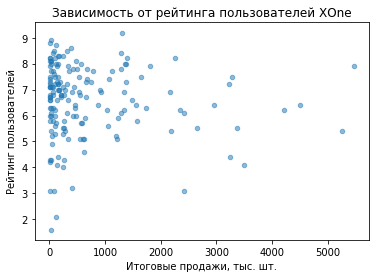

In [71]:
df_xone_us.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.5, title='Зависимость от рейтинга пользователей XOne')
print('Коэффициент Пирсона -', df_xone_us['total_sales'].corr(df_xone_us['user_score'])) 
plt.xlabel('Итоговые продажи, тыс. шт.')
plt.ylabel('Рейтинг пользователей')

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Ну что же, две актуальные платформы показывают одинаковый результат. И тут рейтинг пользоватлей и продажи не имеют линейной зависимости.
    
Будем ориентироваться на рейтинг критиков, им доверяют, а вот в отношении пользоватлей работает поговорка, что на вкус и цвет все фломастеры разные.
</div>

### Распределение игр по жанрам.

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Создадим сводную таблицу по жанрам:
</div>

In [72]:
df_2014_g = df_2014.pivot_table(
    index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean', 'median']
)
df_2014_g.columns = [' '.join(col).strip() for col in df_2014_g.columns.values]
df_2014_g.sort_values(by='sum total_sales', ascending=False)


,sum total_sales,count total_sales,mean total_sales,median total_sales
genre,,,,
Action,199360,619,322.067851,90
Shooter,170940,128,1335.468750,515
Sports,109480,161,680.000000,180
Role-Playing,101440,221,459.004525,110
Misc,37549,113,332.292035,90
Fighting,28220,60,470.333333,125
Racing,27520,69,398.840580,90
Platform,18090,38,476.052632,140
Adventure,17550,185,94.864865,30


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
У нас есть лидер и это игры в жанре Action, в эту же лигу, можно отнести шутеры. А вот далее идет группа середняков в лице спортивных и ролевых игр. Ну и как же без нишевых жанров возглавляемых смешанным жанром и замыкаемые двумя аутсайдерами - стратегиями и пазлами.
    
Таким обрахом очевидно на какие жанры делать упор, и представлять игры верхних жанров в большем ассортименте, а вот игры в жанрах из нижнгей часьти таблицы, вероятно могут быть представлены только лидерами жанров.

И ещё важно обратить внимание, что игры в жанре шутеров имеют в разы лучший средний показатель продаж, тоесть экшены захватили лидерство только благодаря количеству игр в жанре.
</div>

## Портрет пользователя по регионам

### Топ-5 платформ

#### Сводная таблица по NA:

In [73]:
pf_na_pivot = df_2014.pivot_table(
    index='platform', values='na_sales', aggfunc='sum'
).sort_values(by='na_sales', ascending=False)

In [74]:
pf_na_pivot['proportion'] = pf_na_pivot['na_sales'] / pf_na_pivot['na_sales'].sum() 
print(pf_na_pivot.head())

          na_sales  proportion
platform                      
PS4          98610    0.347146
XOne         81270    0.286103
X360         28300    0.099627
3DS          22640    0.079702
PS3          22049    0.077621


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Что ж, вдими что в текущем поколении платформ идет серьезная борьба между PS4 и XOne, но пока первенство за PS4 в регионе NA
</div>

#### Сводная таблица по EU:

In [75]:
pf_eu_pivot = df_2014.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum'
).sort_values(by='eu_sales', ascending=False)

In [76]:
pf_eu_pivot['proportion'] = pf_eu_pivot['eu_sales'] / pf_eu_pivot['eu_sales'].sum() 
print(pf_eu_pivot.head())

          eu_sales  proportion
platform                      
PS4         130040    0.480420
XOne         46250    0.170866
PS3          25540    0.094355
PC           17970    0.066388
3DS          16120    0.059554


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
А вот в EU доминирование PS платформ очевидно.
</div>

#### Сводная таблица по JP:

In [77]:
pf_jp_pivot = df_2014.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum'
).sort_values(by='jp_sales', ascending=False)

In [78]:
pf_jp_pivot['proportion'] = pf_jp_pivot['jp_sales'] / pf_jp_pivot['jp_sales'].sum() 
print(pf_jp_pivot.head())

          jp_sales  proportion
platform                      
3DS          44240    0.475239
PS4          15020    0.161349
PSV          14540    0.156193
PS3          11220    0.120529
WiiU          7310    0.078526


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
В JP картина ещё интереснее, уверенное лидирование японских платформ, при этом новые платформы не смогли оботи по родажам 3DS, а это портативная платформа.Плюс в топе присутствует протативная PSV. Мобильный гейминг побеждал в JP уже тогда.
</div>

### Жанры

#### Сводная таблица по NA:

In [79]:
genre_na_pivot = df_2014.pivot_table(
    index='genre', values='na_sales', aggfunc='sum'
).sort_values(by='na_sales', ascending=False)

In [80]:
genre_na_pivot['proportion'] = genre_na_pivot['na_sales'] / genre_na_pivot['na_sales'].sum() 
genre_na_pivot

,na_sales,proportion
genre,,
Shooter,79020,0.278182
Action,72530,0.255334
Sports,46130,0.162396
Role-Playing,33470,0.117828
Misc,15049,0.052978
Fighting,12430,0.043759
Racing,8740,0.030768
Platform,6790,0.023903
Adventure,5640,0.019855


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Сопостовимые результаты с обще мировыми, что наверное и не удивительно, если учитывать, что NA крупнейший рынок в мире. Лидерство за  Шутерами и Экшнами, плюс на третье позиции Спортом.
</div>

#### Сводная таблица по EU:

In [81]:
genre_eu_pivot = df_2014.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum'
).sort_values(by='eu_sales', ascending=False)

In [82]:
genre_eu_pivot['proportion'] = genre_eu_pivot['eu_sales'] / genre_eu_pivot['eu_sales'].sum() 
genre_eu_pivot

,eu_sales,proportion
genre,,
Action,74680,0.275898
Shooter,65520,0.242057
Sports,45730,0.168945
Role-Playing,28170,0.104071
Racing,14130,0.052202
Misc,12860,0.047510
Simulation,7300,0.026969
Platform,6800,0.025122
Fighting,6690,0.024716


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
В EU наблюдается более равномерное распределение среди жанров, и экшены в лидерах. И да, в EU больше любят гонки.
</div>

#### Сводная таблица по JP:

In [83]:
genre_jp_pivot = df_2014.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum'
).sort_values(by='jp_sales', ascending=False)

In [84]:
genre_jp_pivot['proportion'] = genre_jp_pivot['jp_sales'] / genre_jp_pivot['jp_sales'].sum() 
genre_jp_pivot

,jp_sales,proportion
genre,,
Role-Playing,31160,0.334730
Action,29580,0.317757
Fighting,6370,0.068428
Misc,5610,0.060264
Shooter,4870,0.052315
Adventure,3600,0.038672
Sports,3260,0.035020
Platform,2690,0.028897
Simulation,2310,0.024815


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Вот и тут JP регион показывает серьезные отличия. В лидерах Ролевые игры, а следом идуть экшны, сумарно два лидера захватили 65 проценнтов рынка.
</div>

### ESRB

#### Сводная таблица по NA:

In [85]:
esrb_na_pivot = df_2014.pivot_table(
    index='rating', values='na_sales', aggfunc='sum'
).sort_values(by='na_sales', ascending=False)

In [86]:
esrb_na_pivot['proportion'] = esrb_na_pivot['na_sales'] / esrb_na_pivot['na_sales'].sum() 
esrb_na_pivot

,na_sales,proportion
rating,,
M,96420,0.339437
unrated,64719,0.227836
E,50740,0.178625
T,38950,0.137119
E10+,33230,0.116983


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
В лидерах игры с рейтингм M, это взрослый рейтинг, таким образом убеждаемся, что игры уже давно развлечение не только для детей, взрослые игры в савокупности продались больше чем игры для детей. Так же достаточно в продаже игр не получивших рейтинг, это могут быть старые или мало популярные игры, которые вместе дали второй результат.
</div>

#### Сводная таблица по EU:

In [87]:
esrb_eu_pivot = df_2014.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum'
).sort_values(by='eu_sales', ascending=False)

In [88]:
esrb_eu_pivot['proportion'] = esrb_eu_pivot['eu_sales'] / esrb_eu_pivot['eu_sales'].sum() 
esrb_eu_pivot

,eu_sales,proportion
rating,,
M,93440,0.345205
unrated,58950,0.217785
E,58060,0.214497
T,34070,0.125868
E10+,26160,0.096645


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
В регионе EU практически идентичная картина с распредлением по рейтингам, взросление аудитории наблюдается и здесь. Игры без рейтинга находятся в том же положении.
</div>

#### Сводная таблица по JP:

In [89]:
esrb_jp_pivot = df_2014.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum'
).sort_values(by='jp_sales', ascending=False)

In [90]:
esrb_jp_pivot['proportion'] = esrb_jp_pivot['jp_sales'] / esrb_jp_pivot['jp_sales'].sum() 
esrb_jp_pivot

,jp_sales,proportion
rating,,
unrated,56900,0.611236
T,14780,0.158771
E,8940,0.096036
M,8010,0.086046
E10+,4460,0.047911


В свою очередь JP снова отличается. Здесь нет доменирования игр с рейтингом M. При доминировании портативных платформ это можно понять, ни них больше казуальных игр, а реже встречаются жестокие игры. Но итересно другое, на первом месте с огромным отрывыом игры без рейтинга, можно предположить, что в JP регионе продается много локальных игр, которые просто не участвуют в международной рейтинговой окредитации, 61% впечатляет.

## Проверка гипотез

### Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC



<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Проверяем гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
</div>

In [91]:
xone_df = df_2014.query('platform == "XOne"').dropna()
pc_df = df_2014.query('platform == "PC"').dropna()

In [92]:
print(xone_df['user_score'].mean())
print(pc_df['user_score'].mean())

6.620529801324504
6.3417391304347825


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
В выборках среднее значение рейтинга отличается слабо, давайте проверим может ли появиться такая разница не случайно: Составим нулевую и альтернативную гипотезы и проверим: 


</div>

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не отличаются, отличия средних значений в выборках статистически не значимы.
    
    
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC отличаются, отличия средних в выборках значений статистически значимы.

Воспользуемся t-тестом и будем принимать решение на основе p-значения, порого альфа для этого значения выставим в 1%, достаточно низкий порог для аналитической задачи, это не врачебное решение.
</div>

In [93]:
alpha = 0.01

results = st.ttest_ind(xone_df['user_score'], pc_df['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Вероятно среднее значение пользовательского рейтинга отличается.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Верооятно среднее значение пользовательского рейтинга не отличается.")

p-значение: 0.12817793652639856
Не получилось отвергнуть нулевую гипотезу. Верооятно среднее значение пользовательского рейтинга не отличается.


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Мы не можем утверждать, что средние значения рейтингов отличаются на платформах XOne и PC, отличия средних значений в выборках статистически не значимы. Вероятность получения такой разницы средних в выборке равна ~13%, что достаточно много.
</div>

### Гипотеза о средних пользовательских рейтингах жанров Action и Sports

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Проверяем гипотезу: Средние пользовательских рейтингов жанров Action и Sports одинаковые.
</div>

In [94]:
action_df = df_2014.query('genre == "Action"').dropna()
sport_df = df_2014.query('genre == "Sports"').dropna()

In [95]:
print(action_df['user_score'].mean())
print(sport_df['user_score'].mean())

6.832599118942731
5.68433734939759


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">

В выборках среднее значение рейтинга значительно отличается, давайте проверим может ли появиться такая разница случайно: Составим нулевую и альтернативную гипотезы и проверим: 

</div>

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports не отличаются, отличия средних значений в выборках статистически не значимы.
    
    
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports отличаются, отличия средних в выборках значений статистически значимы.

Воспользуемся t-тестом и будем принимать решение на основе p-значения, порого альфа для этого значения выставим в 1%, достаточно низкий порог для аналитической задачи, это не врачебное решение.
</div>

In [96]:
alpha = 0.01

results = st.ttest_ind(action_df['user_score'], sport_df['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Верооятно среднее значение пользовательского рейтинга отличается.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Верооятно среднее значение пользовательского рейтинга не отличается.")

p-значение: 4.0540895999943536e-10
Отвергаем нулевую гипотезу. Верооятно среднее значение пользовательского рейтинга отличается.


<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Мы можем утверждать, что с высокой вероятность средние значения рейтингов отличаются для жанров Action и Sport, отличия средних значений в выборках статистически значимы. Вероятность получения такой разницы средних в выборке случайно исчезающе мала, мы могли поставить альфа = 0.001 и с запасам отвергнуть нулевую гипотезу.
</div>

## Вывод

<div style="border-radius: 15px; border: 1px solid grey; padding: 15px;">
Проведя анализ можем перейти к общему выводу:
    
    Основной акцент в продвижении в 2017 году стоит сделать на платформах PS4 и XOne, можно так же обратить внимание на PC, которая пусть и не большая но всегда актуальная.
    
    Опорой в продвижении конкретных игр должен служить рейтинг критиков, а не рейтинг ползователей. Пользователеи больше доверяют критикам, чем друг другу.
    
    У нас присутствуют три группы в жанрах игр, выбирая ассортимент даем предпочтение играм жанров из верхней части таблицы, а жанрах из нижней части таблицы должны быть сделаны акценты на лидерах жанра.
    
    Таргетируя предложение на пользователей из опредленных регионов можем воспользоваться чертвертым разделом нашего исследования. Например Приоритетнее предлагать Ролевые игры покупателям из JP региона, в EU регионе больше предлпгать гоночные симуляторы, а Action игры популярны везде.
    
    В платформах по регионам есть разница, например в NA лучше предлагать игры для обеих лидирующих платформ, а в EU деллать акцент на PS4. В JP все сложнее, там был серьезный успех портативных платформ, но в целом по ним видна тенденция к снижению, так что рекомендацие пудет упор на платформы из JP региона в целом.
    Отностительно возрастного рейтинга важно помнить, например, что в JP регионе игры с рейтингом M куда менее популярны, игры без рейтинга на первом месте по продажам и на них стоит обратить внимание.
    
    Мы помним, что пользовательский рейтинг мало влияет на продажи, но в любом случае, по статистике мы получаем, что игроки по разному смотрят на игры разных жанров и в среднем по разному их оценвают.
    А что касается оценки игр пользователями на разных платформах, то они вероятно очень схожи. Игры на разных платформах оставляют схожее впечатление у игрокв, таким образом платформы мало влияют на впечатление от игр как таковых.
</div>